#### Projeto Aplicado: Machine Learning e Análise de Exoplanetas com Dados da NASA


#### Objetivo
O objetivo deste projeto é desenvolver um modelo de machine learning para identificar exoplanetas potencialmente habitáveis com base em dados coletados da NASA Exoplanet Archive.

#### Etapas do Projeto

 - 1. **Coleta de Dados:** Utilizar a API pública da NASA Exoplanet Archive para coletar dados sobre exoplanetas, incluindo informações como período orbital, raio do planeta, temperatura de equilíbrio, entre outros.

- 2. **Preparação de Dados:** Tratar valores ausentes, normalizar dados numéricos e codificar variáveis categóricas, se aplicável.

- 3. **Modelagem e Machine Learning:**
   - **Seleção do Modelo:** Escolher um modelo adequado, como Random Forest, SVM, entre outros, com base na natureza dos dados e nos requisitos do problema.
   - **Treinamento do Modelo:** Utilizar dados de treinamento para treinar o modelo selecionado e ajustar hiperparâmetros para otimização de desempenho.
   - **Avaliação do Modelo:** Avaliar o modelo utilizando métricas como precisão, recall e área sob a curva ROC (AUC) para garantir que generalize bem para novos dados.

- 4. **Interpretação e Aplicação:**
   - **Interpretação dos Resultados:** Analisar quais características dos exoplanetas são mais influentes na classificação de habitabilidade para fornecer insights para pesquisas futuras.
   - **Aplicação do Modelo:** Aplicar o modelo nos dados de teste para avaliar o desempenho na classificação de habitabilidade.

- 5. **Disponibilização:**
   - **Disponibilização do Modelo:** Armazenar o modelo treinado na plataforma AWS (S3) para posterior uso e implementação.

#### Conclusões Finais
Após a conclusão deste projeto, esperamos ter um modelo robusto que possa ser utilizado para identificar exoplanetas habitáveis com alto grau de precisão, contribuindo assim para avanços na pesquisa astronômica.


### 1. Etapa inicial coleta de dados

In [1]:
# Com os modulos, basta executar o código para obter os dados.
from modules.modules import *
api_key = 'sua_chave' # Insira sua chave da API aqui, caso não tenha, pode ser obtida aqui: https://api.nasa.gov/
exoplanet_data = get_exoplanets(api_key)
df = dataframe()

### 2. Etapa de preparação de dados

In [2]:
# Neste dataset temos informações de 9564 exoplanetas com as seguintes informações
'''
Nome da Coluna        Descrição
------------------   -----------------------------------------------------------------------
kepid                Identificador único do Kepler para o sistema planetário
kepoi_name           Nome do KOI (Kepler Object of Interest)
kepler_name          Nome atribuído ao planeta pelo Kepler
koi_disposition      Disposição do KOI pela missão Kepler ('CONFIRMED', 'CANDIDATE', etc.)
koi_pdisposition     Disposição do KOI pela missão Kepler após validação
koi_score            Pontuação de confiabilidade do KOI
koi_fpflag_nt        Flag de não trânsito ('1' se o KOI apresenta sinais de não trânsito)
koi_fpflag_ss        Flag de sinal secundário ('1' se o KOI possui sinais secundários)
koi_fpflag_co        Flag de contaminação do sinal ('1' se o KOI apresenta contaminação)
koi_fpflag_ec        Flag de contaminação de eclíptica ('1' se o KOI apresenta contaminação de eclíptica)
koi_period           Período orbital do planeta em dias
koi_period_err1      Erro positivo no período orbital
koi_period_err2      Erro negativo no período orbital
koi_time0bk          Tempo de trânsito de referência em BKJD (BJD - 2454833)
koi_time0bk_err1     Erro positivo no tempo de trânsito de referência
koi_time0bk_err2     Erro negativo no tempo de trânsito de referência
koi_impact           Parâmetro de impacto
koi_impact_err1      Erro positivo no parâmetro de impacto
koi_impact_err2      Erro negativo no parâmetro de impacto
koi_duration         Duração do trânsito em horas
koi_duration_err1    Erro positivo na duração do trânsito
koi_duration_err2    Erro negativo na duração do trânsito
koi_depth            Profundidade do trânsito em partes por milhão (ppm)
koi_depth_err1       Erro positivo na profundidade do trânsito
koi_depth_err2       Erro negativo na profundidade do trânsito
koi_prad             Raio do planeta em raios da Terra
koi_prad_err1        Erro positivo no raio do planeta
koi_prad_err2        Erro negativo no raio do planeta
koi_teq              Temperatura de equilíbrio do planeta em Kelvin
koi_teq_err1         Erro positivo na temperatura de equilíbrio
koi_teq_err2         Erro negativo na temperatura de equilíbrio
koi_insol            Irradiação do planeta em relação à Terra
koi_insol_err1       Erro positivo na irradiação do planeta
koi_insol_err2       Erro negativo na irradiação do planeta
koi_model_snr        Sinal-ruído do modelo KOI
koi_tce_plnt_num     Número de candidatos de trânsito identificados no sistema KOI
koi_tce_delivname    Nome do produto de entrega TCE
koi_steff            Temperatura efetiva da estrela hospedeira em Kelvin
koi_steff_err1       Erro positivo na temperatura efetiva da estrela hospedeira
koi_steff_err2       Erro negativo na temperatura efetiva da estrela hospedeira
koi_slogg            Logaritmo da gravidade da superfície da estrela hospedeira
koi_slogg_err1       Erro positivo no logaritmo da gravidade da superfície da estrela
koi_slogg_err2       Erro negativo no logaritmo da gravidade da superfície da estrela
koi_srad             Raio da estrela hospedeira em raios solares
koi_srad_err1        Erro positivo no raio da estrela hospedeira
koi_srad_err2        Erro negativo no raio da estrela hospedeira
ra_str               Ascensão reta da estrela hospedeira em formato de string
dec_str              Declinação da estrela hospedeira em formato de string
koi_kepmag           Magnitude aparente da estrela hospedeira na banda Kepler
koi_kepmag_err       Erro na magnitude aparente da estrela hospedeira na banda Kepler
'''
# Visualizando os dados
print(f'Quantidade de linhas e colunas: {len(df)} x {len(df.columns)}')
df.head()

Quantidade de linhas e colunas: 9564 x 50


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


In [3]:
# Selcionando apenas as colunas de interesse e renomeando
nomes_campos = {
'kepid': 'id',
'kepoi_name': 'Nome_KOI',
'kepler_name': 'Nome_Kepler',
'koi_disposition': 'Disposicao_KOI',
'koi_score': 'Pontuacao_KOI',
'koi_period': 'Periodo_Orbital',
'koi_prad': 'Raio_Planeta',
'koi_teq': 'Temperatura_Equilibrio',
'koi_insol': 'Fluxo_Insolacao',
'koi_steff': 'Temperatura_Efetiva',
'koi_slogg': 'Gravidade_Surface',
'koi_period_err1': 'Erro_Periodo_Orbital_+',
'koi_period_err2': 'Erro_Periodo_Orbital_-',
'koi_fpflag_nt': 'Flag_Nao_Transito',
'koi_fpflag_ss': 'Flag_Sinal_Secundario',
'koi_fpflag_co': 'Flag_Contaminacao',
'koi_fpflag_ec': 'Flag_Contaminacao_Ecliptica'
}

# Selecionando campos iterando e renomeado.
df = df[nomes_campos.keys()]
for name in nomes_campos.items():
    df = df.rename(columns={name[0]: name[1]})

# Convertendo coluna Temperatura_Efetiva de Kelvin para Celcius
df['Temperatura_Efetiva'] = df['Temperatura_Efetiva'].apply(lambda x: celcius(x, 'f'))
df.head(5)

,id,Nome_KOI,Nome_Kepler,Disposicao_KOI,Pontuacao_KOI,Periodo_Orbital,Raio_Planeta,Temperatura_Equilibrio,Fluxo_Insolacao,Temperatura_Efetiva,Gravidade_Surface,Erro_Periodo_Orbital_+,Erro_Periodo_Orbital_-,Flag_Nao_Transito,Flag_Sinal_Secundario,Flag_Contaminacao,Flag_Contaminacao_Ecliptica
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,1.000,9.488036,2.26,793.0,93.59,3012.777778,4.467,2.775000e-05,-2.775000e-05,0,0,0,0
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,0.969,54.418383,2.83,443.0,9.11,3012.777778,4.467,2.479000e-04,-2.479000e-04,0,0,0,0
2,10811496,K00753.01,NaN,CANDIDATE,0.000,19.899140,14.60,638.0,39.30,3233.888889,4.544,1.494000e-05,-1.494000e-05,0,0,0,0
3,10848459,K00754.01,NaN,FALSE POSITIVE,0.000,1.736952,33.46,1395.0,891.96,3207.222222,4.564,2.630000e-07,-2.630000e-07,0,1,0,0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,1.000,2.525592,2.75,1406.0,926.16,3332.777778,4.438,3.761000e-06,-3.761000e-06,0,0,0,0


In [4]:
# Visualizando os dados e contagem de valores nulos
nulos(df).sort_values('Nulos', ascending=False)

,Coluna,Nulos,Preenchidos
2,Nome_Kepler,6819,2745
4,Pontuacao_KOI,1510,8054
12,Erro_Periodo_Orbital_-,454,9110
11,Erro_Periodo_Orbital_+,454,9110
6,Raio_Planeta,363,9201
7,Temperatura_Equilibrio,363,9201
9,Temperatura_Efetiva,363,9201
10,Gravidade_Surface,363,9201
8,Fluxo_Insolacao,321,9243
15,Flag_Contaminacao,0,9564


In [5]:
# Podemos notar que a coluna Nome_Kepler detem a maior quantidade de registros nulos neste dataset.
# Remove-la seria uma grande perca de informação para o Modelo de ML e o Projeto. 
# Notei que a coluna Nome_Kepler segue um padrão para todos os registros, como por exemplo Kepler-000 x. 
# Exemplo: Kepler- seguida por 3 ou mais digitos e 1 letra.
# Com base nestas informações podemos preecher esta coluna com dados fictícios para evitar o data-loss.

# Ultimo caracter encontrado nos registros e suas variedades
print(df['Nome_Kepler'].apply(lambda x: str(x).split(' ')[-1]).sort_values().unique())
original_size = len(df)

# Preenchendo os valores nulos de Nome_Kepler com dados fictícios
letras_possiveis = ['r', 'rr',] # Para identificarmos que este kepler foi criado randomicamente.
def kepler_aleatorio():
    numero = random.randint(1, 9999)
    letra = random.choice(letras_possiveis)
    return f'Kepler-{numero} {letra}'

# Preenchendo os valores nulos na coluna Nome_Kepler com nomes aleatórios gerados pela função kepler_aleatorio
df['Nome_Kepler'] = df['Nome_Kepler'].apply(lambda x: kepler_aleatorio() if pd.isnull(x) else x)

# Removendo os registros duplicados da coluna Nome_Kepler
df = df.drop_duplicates('Nome_Kepler', keep='first')

# Verificando novamente os dados
nulos(df).sort_values('Nulos', ascending=False)

['b' 'c' 'd' 'e' 'f' 'g' 'h' 'nan']


,Coluna,Nulos,Preenchidos
4,Pontuacao_KOI,1239,7220
11,Erro_Periodo_Orbital_+,365,8094
12,Erro_Periodo_Orbital_-,365,8094
6,Raio_Planeta,289,8170
7,Temperatura_Equilibrio,289,8170
9,Temperatura_Efetiva,289,8170
10,Gravidade_Surface,289,8170
8,Fluxo_Insolacao,253,8206
15,Flag_Contaminacao,0,8459
14,Flag_Sinal_Secundario,0,8459


In [35]:
# Agora podemos remover os registros nulos e Disposicao_KOI = FALSE POSITIVE, pois a perda de dados já não sera tão grande.
# Removendo os falsos positivos teremos maiores chances de acerto no modelo.
df.dropna(inplace=True)
df.drop(df[df['Disposicao_KOI'] == 'FALSE POSITIVE'].index, inplace=True)

# Observando o tamanho do dataframe apos a remoção dos registros nulos
print(f'Tamanho inicial: {original_size}\nTamanho final: {df.shape[0]}\nData Loss: {original_size - df.shape[0]}')

# Salvando o dataframe
df.to_csv('data/exoplanetas_silver.csv', index=False)

# Agora ja podemos trabalhar com o novo dataframe.
df = pd.read_csv('data/exoplanetas_silver.csv')
df.head()

Tamanho inicial: 9564
Tamanho final: 3894
Data Loss: 5670


,id,Nome_KOI,Nome_Kepler,Disposicao_KOI,Pontuacao_KOI,Periodo_Orbital,Raio_Planeta,Temperatura_Equilibrio,Fluxo_Insolacao,Temperatura_Efetiva,Gravidade_Surface,Erro_Periodo_Orbital_+,Erro_Periodo_Orbital_-,Flag_Nao_Transito,Flag_Sinal_Secundario,Flag_Contaminacao,Flag_Contaminacao_Ecliptica
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,1.000,9.488036,2.26,793.0,93.59,3012.777778,4.467,0.000028,-0.000028,0,0,0,0
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,0.969,54.418383,2.83,443.0,9.11,3012.777778,4.467,0.000248,-0.000248,0,0,0,0
2,10811496,K00753.01,Kepler-7910 rr,CANDIDATE,0.000,19.899140,14.60,638.0,39.30,3233.888889,4.544,0.000015,-0.000015,0,0,0,0
3,10854555,K00755.01,Kepler-664 b,CONFIRMED,1.000,2.525592,2.75,1406.0,926.16,3332.777778,4.438,0.000004,-0.000004,0,0,0,0
4,10872983,K00756.01,Kepler-228 d,CONFIRMED,1.000,11.094321,3.90,835.0,114.81,3341.111111,4.486,0.000020,-0.000020,0,0,0,0


#### 2.1 Um pouco de Data Visualization

- A coluna Disposicao_KOI refere-se à disposição dos exoplanetas no Kepler Object of Interest (KOI), que é uma lista de candidatos a exoplanetas identificados pelo telescópio espacial Kepler da NASA. Essa coluna geralmente classifica os exoplanetas como "CANDIDATE" (candidato a exoplaneta) ou "CONFIRMED" (exoplaneta confirmado), indicando o status de validação dos objetos identificados como exoplanetas.

In [52]:
# 1. Scatter Plot: Raio do Planeta vs. Temperatura de Equilíbrio
# Este gráfico mostra relação entre o raio de um exoplaneta e sua temperatura de equilíbrio.
# Pode ajudar a identificar padrões ou correlações entre o tamanho de um planeta e sua temperatura,
# o que é relevante para a habitabilidade.

fig_scatter = px.scatter(df, x='Raio_Planeta', y='Temperatura_Equilibrio', color='Disposicao_KOI', 
                         hover_name='Nome_Kepler', size='Pontuacao_KOI', 
                         title='Raio do Planeta vs. Temperatura de Equilíbrio',
                         labels={'Raio_Planeta': 'Raio do Planeta (R Terra)', 'Temperatura_Equilibrio': 'Temperatura de Equilíbrio (K)'})

fig_scatter.update_layout(
xaxis_title='Raio do Planeta (R Terra)',
yaxis_title='Temperatura de Equilíbrio (K)',
legend_title='Disposição KOI',
hovermode='closest',
paper_bgcolor='black',
plot_bgcolor='black',
font=dict(color='white'))

fig_scatter.show()

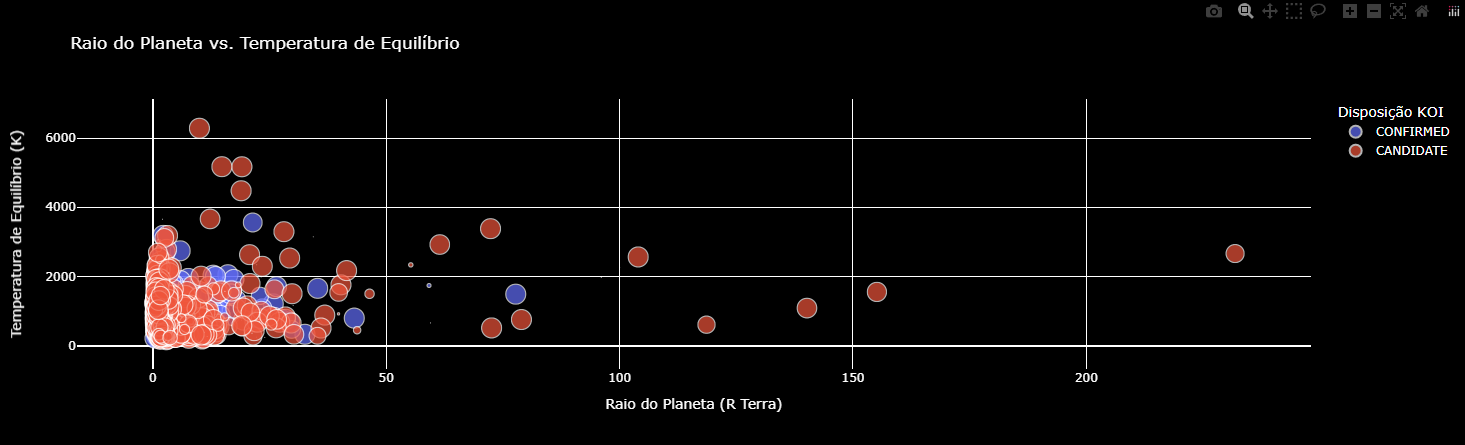

In [38]:
# 3. Box Plot: Distribuição do Período Orbital por Disposição KOI
# Este gráfico mostra a distribuição dos períodos orbitais dos exoplanetas para diferentes categorias de disposição KOI.
# Pode ajudar a identificar se há diferenças significativas nos períodos orbitais entre candidatos e exoplanetas confirmados.

fig_box = px.box(df, x='Disposicao_KOI', y='Periodo_Orbital', 
                 title='Distribuição do Período Orbital por Disposição KOI',
                 labels={'Disposicao_KOI': 'Disposição KOI', 'Periodo_Orbital': 'Período Orbital (dias)'})

fig_box.update_layout(
xaxis_title='Disposição KOI',
yaxis_title='Período Orbital (dias)',
paper_bgcolor='black',
plot_bgcolor='black',
font=dict(color='white'))

fig_box.show()

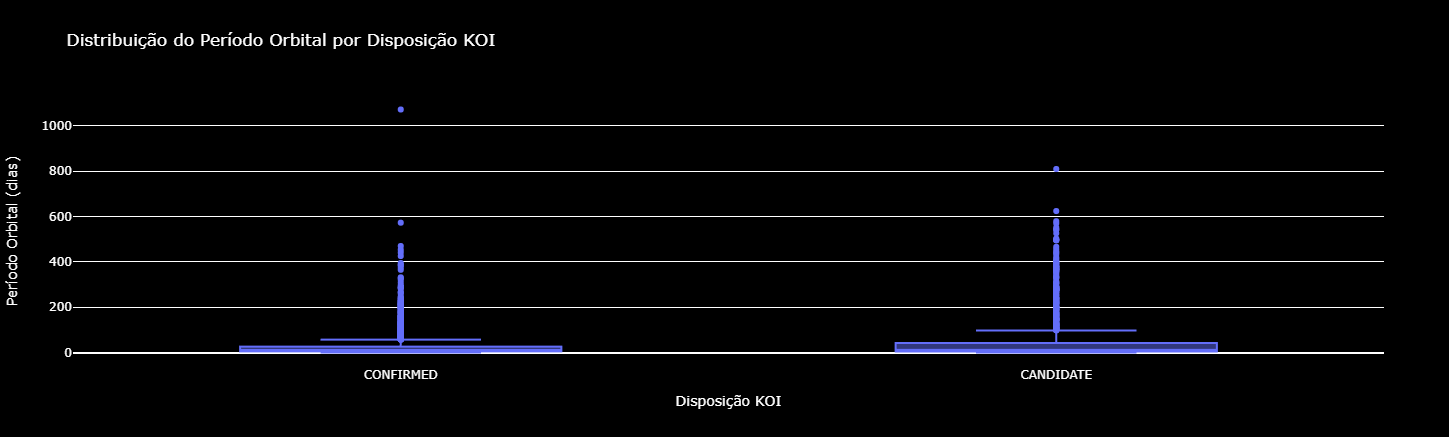

### 3. Etapa de Modelagem e Machine Learning
- Aqui iremos utilizar a função normalizar_treinar_modelo para normalizar os dados e aplicar o modelo de ML.
- Normalização é o processo de ajustar os valores numéricos em um dataset para uma escala comum, geralmente entre 0 e 1, sem distorcer as diferenças nos intervalos de valores. Isso é útil para melhorar o desempenho de algoritmos de aprendizado de máquina.
- Aplicando diversos modelos sobre a Disposicao_KOI para avaliar os resultados.
- A função normalizar_treinar_modelo conta com 6 modelos de ML.
- Sobre os modelos:
- 1. Random Forest
É um conjunto de múltiplas árvores de decisão treinadas com amostras diferentes do dataset.
Utiliza a média ou o voto majoritário dos resultados das árvores para tomar decisões.

- 2. Decision Tree
Modelo de aprendizado supervisionado que divide os dados em subsets baseados em condições em forma de árvore.
Cada nó representa uma condição e cada ramo representa o resultado dessa condição.

- 3. Logistic Regression
Modelo de classificação que usa uma função logística para modelar a probabilidade de uma classe.
Adequado para problemas binários ou multiclasses.

- 4. K-Nearest Neighbors (KNN)
Classifica novos pontos de dados com base na classe dos pontos de dados mais próximos no espaço de características.
Requer a escolha de um valor de K, que é o número de vizinhos a serem considerados.

- 5. SVM (Support Vector Machine)
Encontra o hiperplano ótimo que separa as classes no espaço de características com a maior margem possível.
Eficaz em espaços de alta dimensionalidade e usa diferentes funções kernel para transformar os dados.

- 6. Naive Bayes
Modelo probabilístico baseado no teorema de Bayes, assumindo independência entre as características.
Útil para problemas de classificação com grandes datasets e atributos independentes.

In [39]:
# Selecionando colunas numéricas para normalização utilizando o StandardScaler
colunas_numericas = ['Periodo_Orbital', 'Raio_Planeta', 'Temperatura_Equilibrio', 'Fluxo_Insolacao', 'Temperatura_Efetiva', 'Gravidade_Surface']

# Obsercando a correlação entre as colunas
df[colunas_numericas].corr()

,Periodo_Orbital,Raio_Planeta,Temperatura_Equilibrio,Fluxo_Insolacao,Temperatura_Efetiva,Gravidade_Surface
Periodo_Orbital,1.000000,0.082077,-0.430091,-0.040078,0.076809,-0.071330
Raio_Planeta,0.082077,1.000000,0.127483,0.084513,0.070180,-0.379334
Temperatura_Equilibrio,-0.430091,0.127483,1.000000,0.447489,0.273662,-0.449855
Fluxo_Insolacao,-0.040078,0.084513,0.447489,1.000000,0.003761,-0.273206
Temperatura_Efetiva,0.076809,0.070180,0.273662,0.003761,1.000000,-0.438778
Gravidade_Surface,-0.071330,-0.379334,-0.449855,-0.273206,-0.438778,1.000000


In [40]:
# Aplicando a função para normalizar os e treinar os modelos
normalizar_treinar_modelo(df, colunas=colunas_numericas, prever='Disposicao_KOI', salvar=True)

# Como os resultados de cada modelo podem variar quando rodamos novamente, iremos salvar os resultados de cada modelo.
# E optei tambem por mostrar os resultados em forma de string para facilitar a leitura.

'''
Modelo: Random Forest
Acurácia: 0.7665816326530612
AUC: 0.7780338765008576
              precision    recall  f1-score   support

   CANDIDATE       0.59      0.44      0.50       212
   CONFIRMED       0.81      0.89      0.85       572

    accuracy                           0.77       784
   macro avg       0.70      0.66      0.68       784
weighted avg       0.75      0.77      0.75       784



Modelo: Decision Tree
Acurácia: 0.6913265306122449
AUC: 0.6296345164269692
              precision    recall  f1-score   support

   CANDIDATE       0.44      0.50      0.46       212
   CONFIRMED       0.80      0.76      0.78       572

    accuracy                           0.69       784
   macro avg       0.62      0.63      0.62       784
weighted avg       0.70      0.69      0.70       784



Modelo: Logistic Regression
Acurácia: 0.7512755102040817
AUC: 0.5834295421559572
              precision    recall  f1-score   support

   CANDIDATE       0.84      0.10      0.18       212
   CONFIRMED       0.75      0.99      0.85       572

    accuracy                           0.75       784
   macro avg       0.79      0.55      0.52       784
weighted avg       0.77      0.75      0.67       784



Modelo: K-Nearest Neighbors
Acurácia: 0.7155612244897959
AUC: 0.6054105093020188
              precision    recall  f1-score   support

   CANDIDATE       0.46      0.30      0.36       212
   CONFIRMED       0.77      0.87      0.82       572

    accuracy                           0.72       784
   macro avg       0.62      0.59      0.59       784
weighted avg       0.69      0.72      0.69       784



Modelo: SVM
Acurácia: 0.7461734693877551
AUC: 0.6222704182609843
              precision    recall  f1-score   support

   CANDIDATE       0.84      0.08      0.14       212
   CONFIRMED       0.74      0.99      0.85       572

    accuracy                           0.75       784
   macro avg       0.79      0.54      0.49       784
weighted avg       0.77      0.75      0.66       784



Modelo: Naive Bayes
Acurácia: 0.7563775510204082
AUC: 0.6345988916743633
              precision    recall  f1-score   support

   CANDIDATE       0.71      0.17      0.27       212
   CONFIRMED       0.76      0.97      0.85       572

    accuracy                           0.76       784
   macro avg       0.73      0.57      0.56       784
weighted avg       0.75      0.76      0.70       784
'''

'\nModelo: Random Forest\nAcurácia: 0.7665816326530612\nAUC: 0.7780338765008576\n              precision    recall  f1-score   support\n\n   CANDIDATE       0.59      0.44      0.50       212\n   CONFIRMED       0.81      0.89      0.85       572\n\n    accuracy                           0.77       784\n   macro avg       0.70      0.66      0.68       784\nweighted avg       0.75      0.77      0.75       784\n\n\n\nModelo: Decision Tree\nAcurácia: 0.6913265306122449\nAUC: 0.6296345164269692\n              precision    recall  f1-score   support\n\n   CANDIDATE       0.44      0.50      0.46       212\n   CONFIRMED       0.80      0.76      0.78       572\n\n    accuracy                           0.69       784\n   macro avg       0.62      0.63      0.62       784\nweighted avg       0.70      0.69      0.70       784\n\n\n\nModelo: Logistic Regression\nAcurácia: 0.7512755102040817\nAUC: 0.5834295421559572\n              precision    recall  f1-score   support\n\n   CANDIDATE       0

#### 4. Etapa de Interpretação e Aplicação

#### Observações sobre os modelos:
- Os modelos apresentaram acurácias entre 70% e 75%, o que indica um desempenho moderado.
- A classe "CONFIRMED" geralmente tem maior precisão e recall em comparação com a classe "CANDIDATE".
- A classe "CANDIDATE" apresenta baixo recall, indicando que muitos exemplos desta classe estão sendo classificados incorretamente como "CONFIRMED".

- Decision Tree e Naive Bayes apresentam resultados moderados, mas inferiores ao Random Forest.
- Logistic Regression, K-Nearest Neighbors, e SVM têm dificuldades em prever a classe "CANDIDATE" de forma eficaz, como evidenciado por seus baixos f1-scores e AUCs.


In [47]:
# Criando um dicionário para armazenar os resultados
resultados = {
'Modelo': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes'],
'Acurácia': [0.7665816326530612, 0.6913265306122449, 0.7512755102040817, 0.7155612244897959, 0.7461734693877551, 0.7563775510204082],
'AUC': [0.7780338765008576, 0.6296345164269692, 0.5834295421559572, 0.6054105093020188, 0.6222704182609843, 0.6345988916743633]}

# Plotando os resultados
fig = go.Figure()
# Adicionando barras para Acurácia
fig.add_trace(go.Bar(x=resultados['Modelo'], y=resultados['Acurácia'], name='Acurácia', marker_color='steelblue'))

# Adicionando linha para AUC
fig.add_trace(go.Scatter(x=resultados['Modelo'], y=resultados['AUC'], mode='lines+markers', name='AUC', marker_color='red'))

# Atualizando o layout
fig.update_layout(
title='Acurácia e AUC dos Modelos',
xaxis_title='Modelo',
yaxis_title='Valor',
legend_title='Métricas',
paper_bgcolor='black',
plot_bgcolor='black',
font=dict(color='white'),
barmode='group')

fig.show()

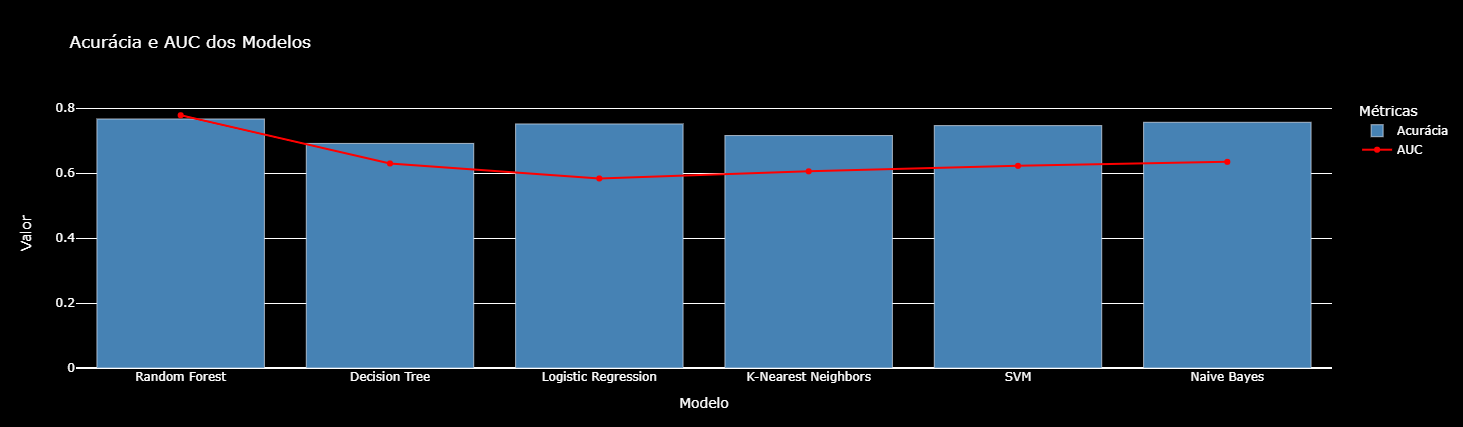

#### Conclusões:
- O modelo Random Forest apresentou a melhor acurácia e AUC entre todos os modelos testados.
- Com alta precisão e recall para a classe "CONFIRMED", ele se destaca como o mais equilibrado e confiável para prever exoplanetas habitáveis.

In [42]:
# Agora que ja temos os modelos treinandos e avaliando, podemos usar eles para fazer previsões de exoplanetas.
# Dados fictícios de exemplo para fazer a previsão de habitabilidade
input_exoplaneta = {
'Periodo_Orbital': 300,
'Raio_Planeta': 1.2,
'Temperatura_Equilibrio': 500,
'Fluxo_Insolacao': 1.5,
'Temperatura_Efetiva': 1000,
'Gravidade_Surface': 9.8}

# Nome do modelo (sem a extensão .pkl)
nome_modelo = 'Random Forest'

# Fazendo a previsão usando o modelo 'Random Forest'
resultado_previsao = fazer_previsao(input_exoplaneta, nome_modelo)
resultado_previsao

'CANDIDATE'

#### 5. Etapa Final Disponibilização do Modelo 

##### Aqui temos uma imagem de um bucket s3 na aws.
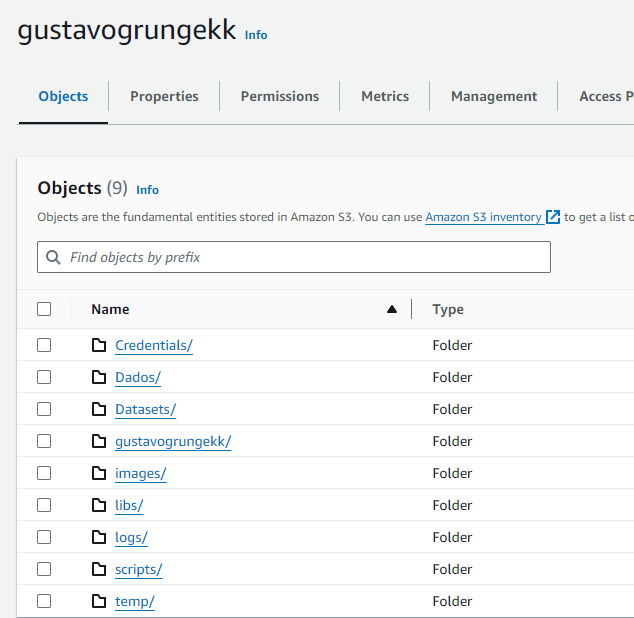

In [43]:
# Iremos utilizar a função para efetuar o upload do modelo para o bucket
# Caso queira replicar o processo em outro lugar, basta alterar os parâmetros com suas credenciais AWS.
# Alterar para o seu bucket e prefixo junto com o nome do modelo.
# Caso não tenha chave de acesso de acesso da AWS a funcão ira falhar.
# Para obter suas credenciais de acesso basta criar uma conta na AWS.
# E inslatar o AWS CLI na sua maquina. Link para configuração: https://docs.aws.amazon.com/cli/latest/userguide/getting-started-quickstart.html
model_to_s3(modelo='Random Forest',
            bucket='gustavogrungekk',
            prefix='ml_models',
            region='sa-east-1',
            aws_access_key_id='SUACHAVEDEACESSO',
            aws_secret_access_key='SUACHAVESECRETADEACESSO')

Modelo Random Forest.pkl enviado com sucesso para o bucket gustavogrungekk.


##### Diretorio ml_model criado para salvar os modelos.
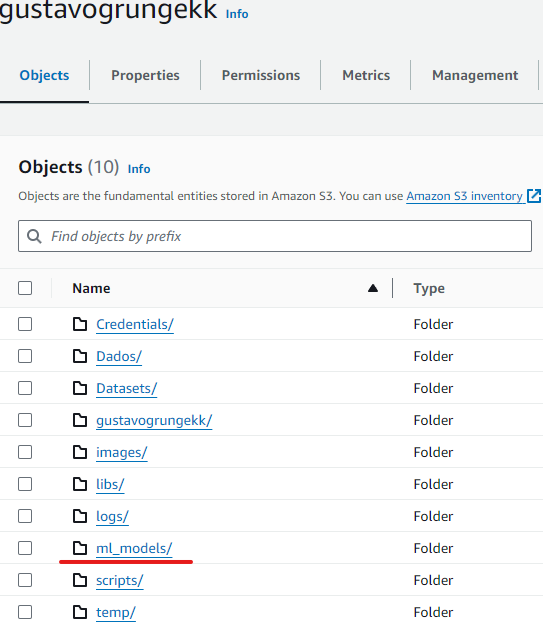

##### Modelo disponibilizado no bucket s3
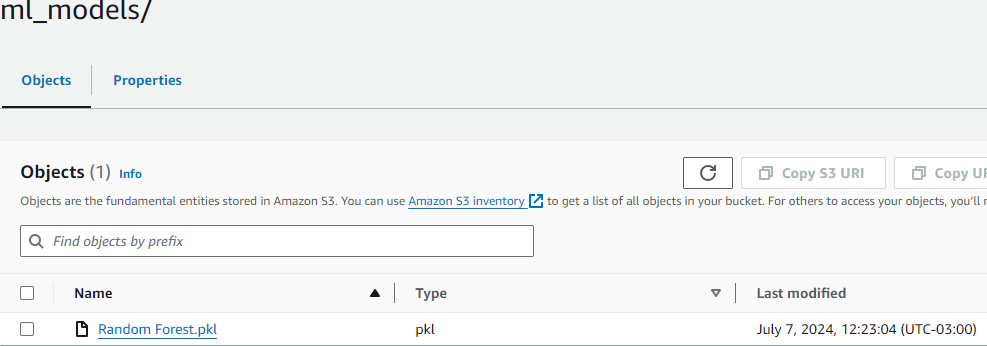